In [2]:
import pandas as pd

# Step 1: Load the dataset
file_path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'
df = pd.read_csv(file_path)

# Step 2: Ensure Material is string type
df['Material'] = df['Material'].astype(str)

# Step 3: Filter for Material F360016CP
material_F360016CP = df[df['Material'].str.strip() == 'F360016CP']

# Step 4: Reshape to Time Series (Month → Demand)
drop_cols = ['Material', 'Description', 'Range', 'Subcat']
material_F360016CP_ts = material_F360016CP.drop(columns=drop_cols)

# Step 5: Transpose
material_F360016CP_ts = material_F360016CP_ts.transpose()

# Step 6: Clean the index
material_F360016CP_ts.index = material_F360016CP_ts.index.str.replace('Actual', '', regex=False)
material_F360016CP_ts.index = material_F360016CP_ts.index.str.strip()

# Step 7: Reset index and rename columns
material_F360016CP_ts = material_F360016CP_ts.reset_index()
material_F360016CP_ts.columns = ['Month', 'Demand']

# Step 8: Convert 'Month' into datetime and move to Month-End
material_F360016CP_ts['Month'] = pd.to_datetime(material_F360016CP_ts['Month'], format='%b %y')
material_F360016CP_ts['Month'] = material_F360016CP_ts['Month'] + pd.offsets.MonthEnd(0)

# Step 9: Final time series ready
print(material_F360016CP_ts)


        Month  Demand
0  2021-04-30     281
1  2021-05-31     183
2  2021-06-30     770
3  2021-07-31     482
4  2021-08-31     908
5  2021-09-30     618
6  2021-10-31     713
7  2021-11-30     744
8  2021-12-31     324
9  2022-01-31     672
10 2022-02-28     954
11 2022-03-31     638
12 2022-04-30    1371
13 2022-05-31     917
14 2022-06-30     427
15 2022-07-31     325
16 2022-08-31     105
17 2022-09-30      76
18 2022-10-31    1949
19 2022-11-30    1109
20 2022-12-31     337
21 2023-01-31     895
22 2023-02-28     873
23 2023-03-31     484
24 2023-04-30     728
25 2023-05-31     286
26 2023-06-30     333
27 2023-07-31     332
28 2023-08-31     332
29 2023-09-30     709
30 2023-10-31     433
31 2023-11-30     677


Missing values:
 Month     0
Demand    0
dtype: int64

Summary Statistics:
 count      32.000000
mean      624.531250
std       387.497845
min        76.000000
25%       332.000000
50%       628.000000
75%       795.750000
max      1949.000000
Name: Demand, dtype: float64


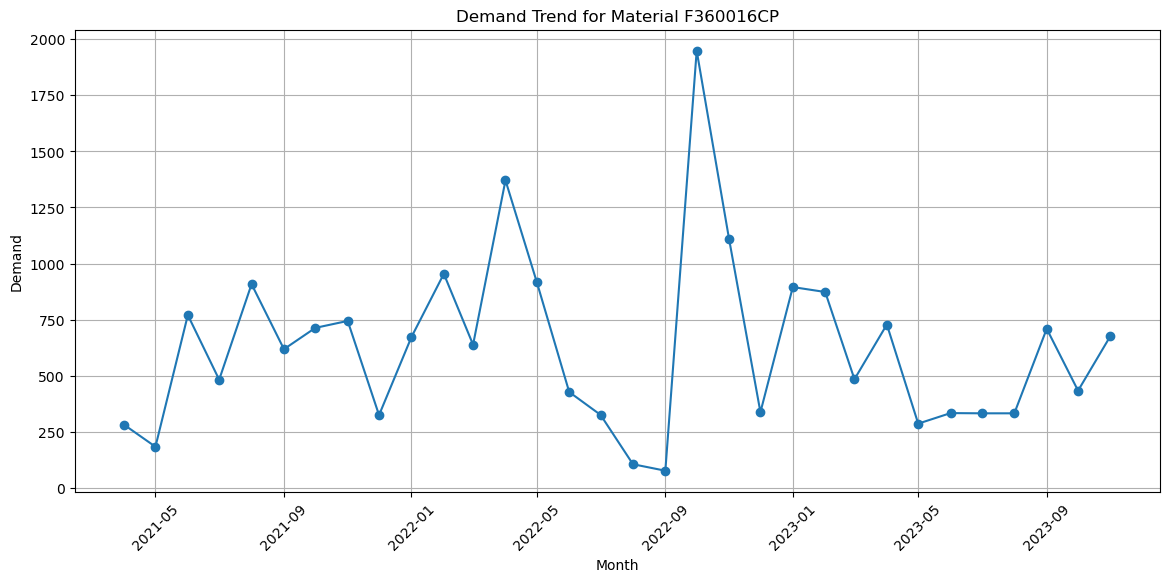

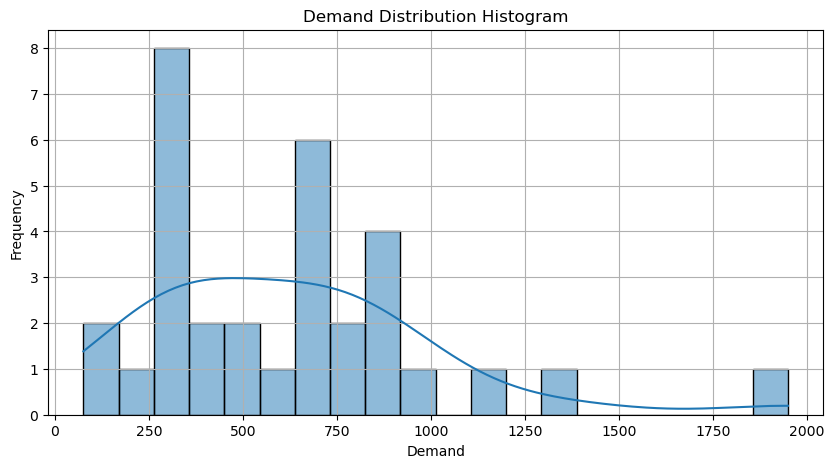

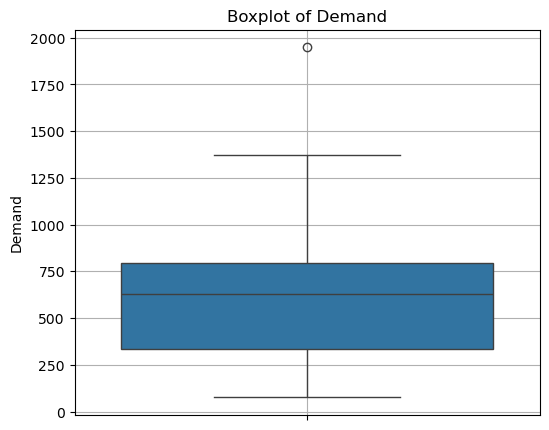

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Prepare Material F360016CP
df['Material'] = df['Material'].astype(str)  # Ensure 'Material' is string
material_F360016CP = df[df['Material'].str.strip() == 'F360016CP']

# Drop unnecessary columns
drop_cols = ['Material', 'Description', 'Range', 'Subcat']
material_F360016CP_ts = material_F360016CP.drop(columns=drop_cols).transpose()

# Clean the index and format
material_F360016CP_ts.index = material_F360016CP_ts.index.str.replace('Actual', '')
material_F360016CP_ts.index = material_F360016CP_ts.index.str.strip()

material_F360016CP_ts = material_F360016CP_ts.reset_index()
material_F360016CP_ts.columns = ['Month', 'Demand']

# Convert Month to datetime and Demand to numeric
material_F360016CP_ts['Month'] = pd.to_datetime(material_F360016CP_ts['Month'], format='%b %y')
material_F360016CP_ts['Demand'] = material_F360016CP_ts['Demand'].astype(float)

# Step 2: Check for missing values
print("Missing values:\n", material_F360016CP_ts.isnull().sum())

# Step 3: Basic statistics
print("\nSummary Statistics:\n", material_F360016CP_ts['Demand'].describe())

# Step 4: Plot the demand trend over time
plt.figure(figsize=(14, 6))
plt.plot(material_F360016CP_ts['Month'], material_F360016CP_ts['Demand'], marker='o')
plt.title('Demand Trend for Material F360016CP')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Step 5: Plot histogram of Demand
plt.figure(figsize=(10, 5))
sns.histplot(material_F360016CP_ts['Demand'], bins=20, kde=True)
plt.title('Demand Distribution Histogram')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 6: Plot boxplot to detect outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=material_F360016CP_ts['Demand'])
plt.title('Boxplot of Demand')
plt.grid(True)
plt.show()


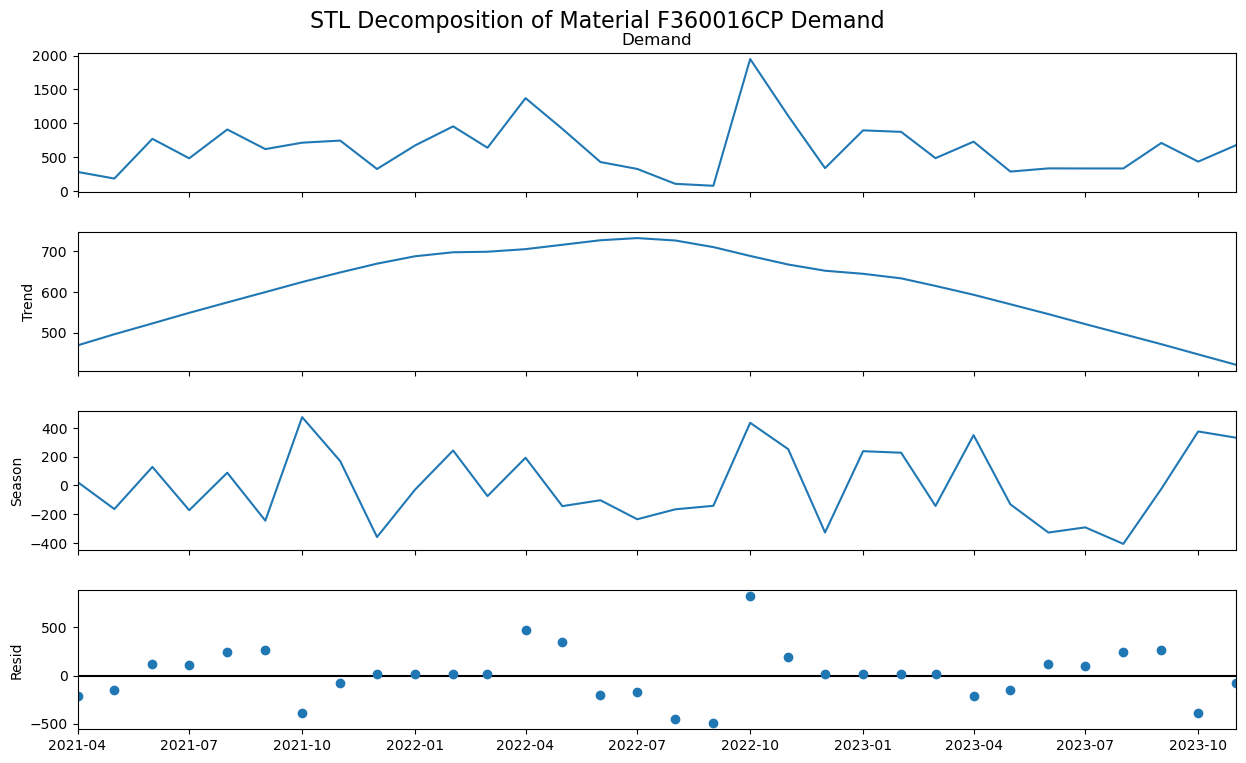

In [4]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Step 1: Set 'Month' as index
material_F360016CP_ts_stl = material_F360016CP_ts.set_index('Month')

# Step 2: Apply STL decomposition
stl = STL(material_F360016CP_ts_stl['Demand'], seasonal=13)  # 13 because monthly data (captures yearly seasonality)
result = stl.fit()

# Step 3: Plot the decomposition
fig = result.plot()
fig.set_size_inches(14, 8)
fig.suptitle('STL Decomposition of Material F360016CP Demand', fontsize=16)
plt.show()


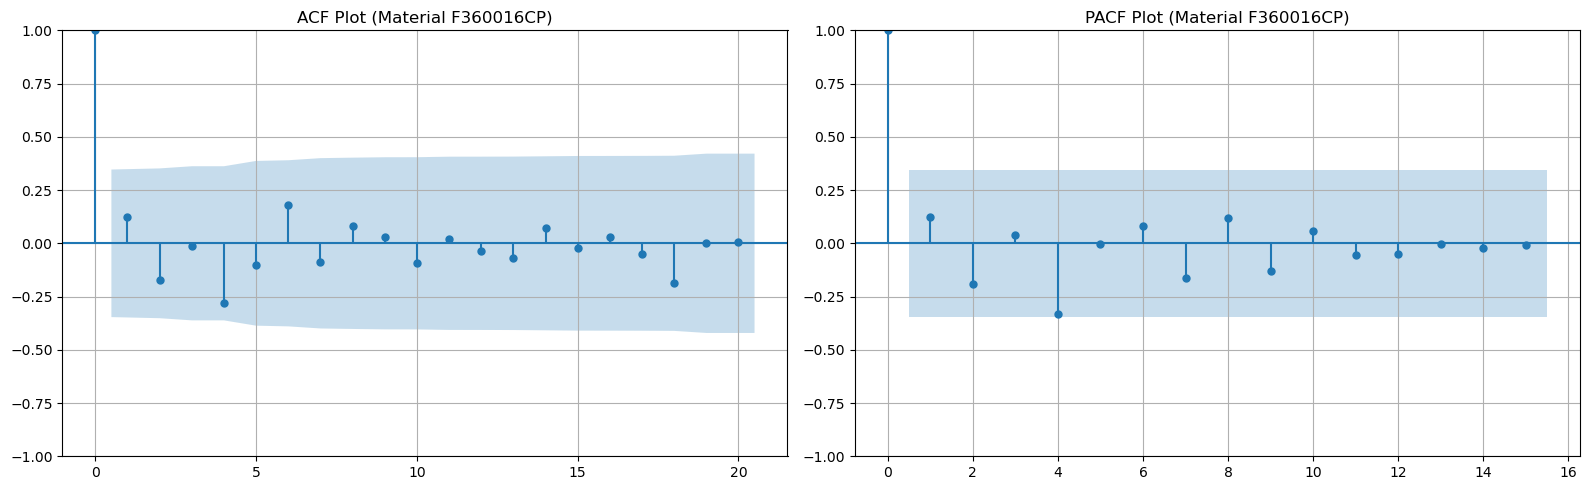

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Only take Demand column for plotting
demand_series = material_F360016CP_ts['Demand']  # 👈 Now using F360016CP

# ACF and PACF Plots for original series
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ACF plot
plot_acf(demand_series, lags=20, ax=axes[0], title='ACF Plot (Material F360016CP)')
axes[0].grid(True)

# PACF plot
plot_pacf(demand_series, lags=15, ax=axes[1], method='ywm', title='PACF Plot (Material F360016CP)')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

# Set 'Month' as index (if not already)
material_F360016CP_ts_stl = material_F360016CP_ts.set_index('Month')

# Perform ADF Test
adf_result = adfuller(material_F360016CP_ts_stl['Demand'])

# Print ADF results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'    {key}: {value}')
    
# Conclusion
if adf_result[1] < 0.05:
    print("\n The series is Stationary (reject H₀).")
else:
    print("\n The series is Non-Stationary (fail to reject H₀).")


ADF Statistic: -4.81929758077187
p-value: 4.9946822506937944e-05
Critical Values:
    1%: -3.661428725118324
    5%: -2.960525341210433
    10%: -2.6193188033298647

 The series is Stationary (reject H₀).


🔍 Missing values:
 Month     0
Demand    0
dtype: int64

📊 Summary Statistics:
 count      32.000000
mean      624.531250
std       387.497845
min        76.000000
25%       332.000000
50%       628.000000
75%       795.750000
max      1949.000000
Name: Demand, dtype: float64


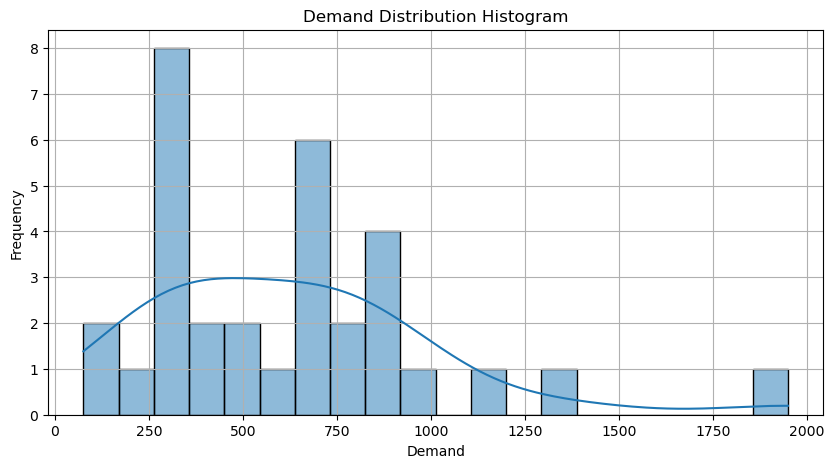

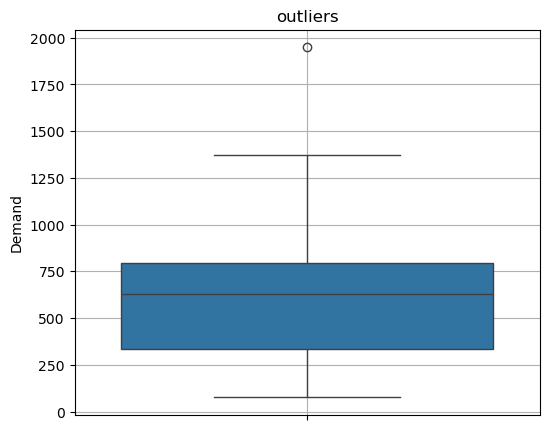

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

# Step 1: Load your dataset
file_path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'  # your local path
df = pd.read_csv(file_path)

# Step 2: Prepare data for Material F360016CP
df['Material'] = df['Material'].astype(str)  # Ensure 'Material' is string
material_F360016CP = df[df['Material'].str.strip() == 'F360016CP']

drop_cols = ['Material', 'Description', 'Range', 'Subcat']
material_F360016CP_ts = material_F360016CP.drop(columns=drop_cols).transpose()

material_F360016CP_ts.index = material_F360016CP_ts.index.str.replace('Actual', '')
material_F360016CP_ts.index = material_F360016CP_ts.index.str.strip()

material_F360016CP_ts = material_F360016CP_ts.reset_index()
material_F360016CP_ts.columns = ['Month', 'Demand']

material_F360016CP_ts['Month'] = pd.to_datetime(material_F360016CP_ts['Month'], format='%b %y')
material_F360016CP_ts['Demand'] = material_F360016CP_ts['Demand'].astype(float)

# Step 3: Check for missing values
print("🔍 Missing values:\n", material_F360016CP_ts.isnull().sum())

# Step 4: Summary statistics
print("\n📊 Summary Statistics:\n", material_F360016CP_ts['Demand'].describe())


# Step 6: Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(material_F360016CP_ts['Demand'], bins=20, kde=True)
plt.title('Demand Distribution Histogram')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 7: Plot boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=material_F360016CP_ts['Demand'])
plt.title('outliers')
plt.grid(True)
plt.show()




In [8]:
# Preparing the data
material_F360016CP_ts['Month'] = pd.to_datetime(material_F360016CP_ts['Month'], format='%b %y')
material_F360016CP_ts = material_F360016CP_ts.set_index('Month')
material_F360016CP_ts.index.freq = 'MS'  # manually setting Monthly Start

# Splitting into train and test sets
data = material_F360016CP_ts
train = data.iloc[:-4]
test = data.iloc[-4:]


In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Fit Simple Exponential Smoothing (SES) model on training data
ses_model = SimpleExpSmoothing(train['Demand']).fit()

# Step 2: Predict for the test period (next 4 months)
ses_pred_test = ses_model.forecast(steps=4)

# Step 3: Calculate MAPE on test data
mape_test = mean_absolute_percentage_error(test['Demand'], ses_pred_test) * 100

print(f" MAPE on Test Set (SES): {mape_test:.2f}%")

# Step 4: Forecast for next 3 months (Dec 2023, Jan 2024, Feb 2024)
ses_model_full = SimpleExpSmoothing(data['Demand']).fit()
ses_forecast_next3 = ses_model_full.forecast(steps=3)

print("\n Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(ses_forecast_next3)


 MAPE on Test Set (SES): 33.63%

 Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    553.838662
2024-01-01    553.838662
2024-02-01    553.838662
Freq: MS, dtype: float64


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Differencing (if needed) — assuming non-stationary from ADF test
train_diff = train['Demand'].diff().dropna()

# Step 2: Fit ARIMA model (p,d,q)
# Initial guess: p=1, d=1 (1st differencing), q=1
model = ARIMA(train['Demand'], order=(1,1,1))
model_fit = model.fit()

# Step 3: Predict for the next 4 months (test set)
forecast_test = model_fit.forecast(steps=4)

# Step 4: Calculate MAPE on Test set
mape_arima = mean_absolute_percentage_error(test['Demand'], forecast_test) * 100
print(f" MAPE on Test Set (ARIMA): {mape_arima:.2f}%")

# Step 5: Retrain ARIMA on full data
final_model = ARIMA(data['Demand'], order=(1,1,1))
final_model_fit = final_model.fit()

# Step 6: Forecast for next 3 months (Dec 2023 - Feb 2024)
forecast_next3 = final_model_fit.forecast(steps=3)

print("\n Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_next3)


 MAPE on Test Set (ARIMA): 34.80%

 Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    629.314439
2024-01-01    621.593978
2024-02-01    620.344008
Freq: MS, Name: predicted_mean, dtype: float64


In [11]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Prepare data for Prophet
train_prophet = train.reset_index().rename(columns={'Month':'ds', 'Demand':'y'})
test_prophet = test.reset_index().rename(columns={'Month':'ds', 'Demand':'y'})
full_prophet = data.reset_index().rename(columns={'Month':'ds', 'Demand':'y'})

# Step 2: Fit Prophet model on training data
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Step 3: Create future dataframe for test period (4 months ahead)
future_test = prophet_model.make_future_dataframe(periods=4, freq='MS')
forecast_test = prophet_model.predict(future_test)

# Get only the forecasted part (last 4 months)
forecast_test_part = forecast_test.iloc[-4:]['yhat']

# Step 4: Calculate MAPE on test set
mape_prophet = mean_absolute_percentage_error(test_prophet['y'], forecast_test_part) * 100
print(f" MAPE on Test Set (Prophet): {mape_prophet:.2f}%")

# Step 5: Retrain Prophet on full data
prophet_full_model = Prophet()
prophet_full_model.fit(full_prophet)

# Step 6: Forecast for next 3 months (Dec 2023 - Feb 2024)
future_full = prophet_full_model.make_future_dataframe(periods=3, freq='MS')
forecast_next3 = prophet_full_model.predict(future_full)
forecast_next3_part = forecast_next3.iloc[-3:]['yhat']

print("\n Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_next3_part)


01:14:41 - cmdstanpy - INFO - Chain [1] start processing
01:14:41 - cmdstanpy - INFO - Chain [1] done processing
01:14:41 - cmdstanpy - INFO - Chain [1] start processing


 MAPE on Test Set (Prophet): 247.44%


01:14:41 - cmdstanpy - INFO - Chain [1] done processing



 Forecast for next 3 months (Dec 2023 - Feb 2024):
32    235.925763
33    919.169445
34    563.011784
Name: yhat, dtype: float64


In [12]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Step 1: Create lag features
def create_lag_features(df, n_lags):
    df = df.copy()
    for lag in range(1, n_lags+1):
        df[f'lag_{lag}'] = df['Demand'].shift(lag)
    df.dropna(inplace=True)
    return df

# Create lag features
n_lags = 12  # using past 12 months
data_lagged = create_lag_features(material_F360016CP_ts, n_lags)

# Split into train and test
train_lagged = data_lagged.iloc[:-4]
test_lagged = data_lagged.iloc[-4:]

X_train = train_lagged.drop('Demand', axis=1)
y_train = train_lagged['Demand']
X_test = test_lagged.drop('Demand', axis=1)
y_test = test_lagged['Demand']

# Step 2: Fit XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred_test = xgb_model.predict(X_test)

# Step 4: Calculate MAPE
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_test) * 100
print(f" MAPE on Test Set (XGBoost) for Material F360016CP: {mape_xgb:.2f}%")

# Step 5: Retrain XGBoost on full data
X_full = data_lagged.drop('Demand', axis=1)
y_full = data_lagged['Demand']
xgb_final_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_final_model.fit(X_full, y_full)

# Step 6: Forecast next 3 months manually
future_preds = []
last_row = X_full.iloc[-1].values.reshape(1, -1)

for i in range(3):
    pred = xgb_final_model.predict(last_row)[0]
    future_preds.append(pred)
    
    # Update last_row by shifting and inserting the new prediction
    last_row = np.roll(last_row, -1)
    last_row[0, -1] = pred  # Set latest lag with the new prediction

# Step 7: Output future forecast
future_dates = pd.date_range(start=material_F360016CP_ts.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')

forecast_next3 = pd.Series(future_preds, index=future_dates)

print("\n Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_next3)


 MAPE on Test Set (XGBoost) for Material F360016CP: 84.85%

 Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    676.999756
2024-01-01    349.147766
2024-02-01    489.567993
Freq: MS, dtype: float32


In [13]:
from sklearn.metrics import mean_absolute_percentage_error

# NAIVE Model
# Step 1: Last observed value as forecast
naive_forecast_test = [train['Demand'].iloc[-1]] * 4  # repeat last value 4 times

# Step 2: Calculate MAPE on test
mape_naive = mean_absolute_percentage_error(test['Demand'], naive_forecast_test) * 100
print(f"MAPE on Test Set (Naive): {mape_naive:.2f}%")

# Step 3: Forecast next 3 months
naive_forecast_next3 = [data['Demand'].iloc[-1]] * 3

# Step 4: Create dates
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')
naive_forecast_series = pd.Series(naive_forecast_next3, index=future_dates)

print("\nNaive Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(naive_forecast_series)


MAPE on Test Set (Naive): 31.86%

Naive Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    677.0
2024-01-01    677.0
2024-02-01    677.0
Freq: MS, dtype: float64


In [14]:
from statsmodels.tsa.arima.model import ARIMA

# MA Model (Moving Average part only, p=0, d=0, q=1 or q=2)
ma_model = ARIMA(train['Demand'], order=(0,0,2))  # (p,d,q): Moving Average
ma_model_fit = ma_model.fit()

# Step 1: Predict test
ma_forecast_test = ma_model_fit.forecast(steps=4)

# Step 2: MAPE
mape_ma = mean_absolute_percentage_error(test['Demand'], ma_forecast_test) * 100
print(f"MAPE on Test Set (MA Model): {mape_ma:.2f}%")

# Step 3: Retrain full data and forecast next 3 months
ma_final_model = ARIMA(data['Demand'], order=(0,0,2))
ma_final_fit = ma_final_model.fit()

ma_forecast_next3 = ma_final_fit.forecast(steps=3)

print("\nMA Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(ma_forecast_next3)


MAPE on Test Set (MA Model): 74.81%

MA Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    721.298431
2024-01-01    604.340540
2024-02-01    629.636123
Freq: MS, Name: predicted_mean, dtype: float64


In [15]:
# AR Model (Auto-Regressive part only, p=2, d=0, q=0)
ar_model = ARIMA(train['Demand'], order=(2,0,0))  # (p,d,q): Auto-Regressive
ar_model_fit = ar_model.fit()

# Step 1: Predict test
ar_forecast_test = ar_model_fit.forecast(steps=4)

# Step 2: MAPE
mape_ar = mean_absolute_percentage_error(test['Demand'], ar_forecast_test) * 100
print(f"MAPE on Test Set (AR Model): {mape_ar:.2f}%")

# Step 3: Retrain full data and forecast next 3 months
ar_final_model = ARIMA(data['Demand'], order=(2,0,0))
ar_final_fit = ar_final_model.fit()

ar_forecast_next3 = ar_final_fit.forecast(steps=3)

print("\nAR Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(ar_forecast_next3)


MAPE on Test Set (AR Model): 39.23%

AR Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    668.315560
2024-01-01    620.775001
2024-02-01    615.689128
Freq: MS, Name: predicted_mean, dtype: float64


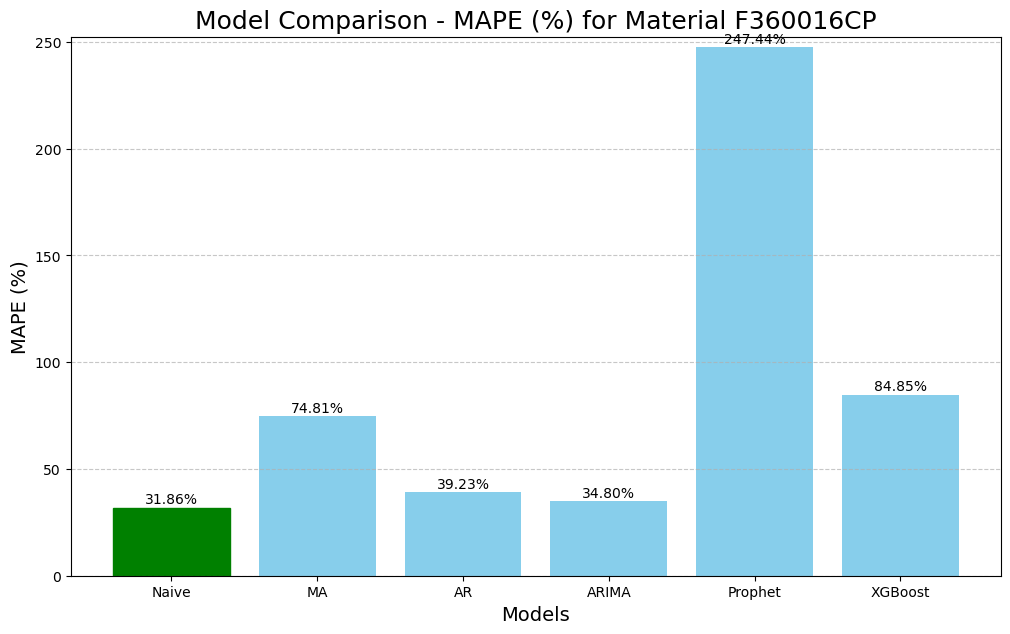

In [16]:
import matplotlib.pyplot as plt

# Step 1: Store the MAPE values for all models (including Naive, MA, AR)
model_mape = {
    'Naive': mape_naive,
    'MA': mape_ma,
    'AR': mape_ar,
    'ARIMA': mape_arima,
    'Prophet': mape_prophet,
    'XGBoost': mape_xgb
}

# Step 2: Plot the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(model_mape.keys(), model_mape.values(), color='skyblue')

# Step 3: Highlight the best model (lowest MAPE) in green
best_model_idx = list(model_mape.values()).index(min(model_mape.values()))
bars[best_model_idx].set_color('green')

# Step 4: Add labels and title
plt.title('Model Comparison - MAPE (%) for Material F360016CP', fontsize=18)
plt.ylabel('MAPE (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, max(model_mape.values()) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add MAPE values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Data preparation
actual = data.copy()

# Prepare ARIMA predictions
forecast_test_trimmed = forecast_test.iloc[-len(test.index):]['yhat']

if len(forecast_test_trimmed) != len(test.index):
    raise ValueError(f"Length mismatch: forecast_test_trimmed has {len(forecast_test_trimmed)} elements, but test.index has {len(test.index)} elements.")

predicted_test = pd.Series(forecast_test_trimmed.values, index=test.index)

# Future forecast (given values)
forecast_index = pd.date_range(start='2023-12-01', periods=3, freq='MS')
forecast_future = pd.Series([30604.458842, 30540.753147, 30541.808252], index=forecast_index)

# Step 3: Label the points with dynamic padding
for x, y in zip(actual.index, actual['Demand']):
    ax.text(x, y+max(10, y*0.02), f'{int(y)}', ha='center', fontsize=8)
for x, y in zip(predicted_test.index, predicted_test.values):
    ax.text(x, y+max(10, y*0.02), f'{int(y)}', ha='center', fontsize=8)
for x, y in zip(forecast_future.index, forecast_future.values):
    ax.text(x, y+max(10, y*0.02), f'{int(y)}', ha='center', fontsize=8, color='green')

# Step 5: Custom y-axis based on demand size
demand_max = max(actual['Demand'].max(), forecast_future.max())

if demand_max > 30000:
    ax.set_ylim(0, 35000)
    ax.set_yticks(np.arange(0, 35001, 5000))  # Step of 5000
elif demand_max <= 3000:
    ax.set_ylim(0, demand_max + 200)
    ax.set_yticks(np.arange(0, demand_max + 201, 100))  # Step of 100
else:
    step = 500
    ax.set_ylim(0, demand_max + 500)
    ax.set_yticks(np.arange(0, demand_max + 501, step))  # Step of 500

# Step 6: Tight layout for clean plot
plt.tight_layout()

# Step 7: Show the plot
plt.show()

# Step 8: Print model performance
print(f"\n Best Model: ARIMA for Material F360016CP")
print(f" MAPE on Test Set: {mape_arima:.2f}%\n")
print(" Forecast for Next 3 Months (Dec 2023 - Feb 2024):")
print(forecast_future.round(2))



<Figure size 640x480 with 0 Axes>


 Best Model: ARIMA for Material F360016CP
 MAPE on Test Set: 34.80%

 Forecast for Next 3 Months (Dec 2023 - Feb 2024):
2023-12-01    30604.46
2024-01-01    30540.75
2024-02-01    30541.81
Freq: MS, dtype: float64


In [18]:
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

# NAIVE Model

# Step 1: Last observed value from training data as forecast
naive_forecast_test = [train['Demand'].iloc[-1]] * len(test)

# Step 2: Calculate MAPE on test set
mape_naive = mean_absolute_percentage_error(test['Demand'], naive_forecast_test) * 100
print(f"MAPE on Test Set (Naive): {mape_naive:.2f}%")

# Step 3: Forecast next 3 months
naive_forecast_next3 = [data['Demand'].iloc[-1]] * 3  # last observed demand overall

# Step 4: Create future dates for next 3 months
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')
naive_forecast_series = pd.Series(naive_forecast_next3, index=future_dates)

# Step 5: Combine actual, predicted, and forecast into a single DataFrame
results_df = pd.DataFrame({
    "Actual (Test)": test['Demand'].values,
    "Predicted (Naive)": naive_forecast_test
}, index=test.index)

forecast_df = pd.DataFrame({
    "Forecast (Next 3 Months)": naive_forecast_series
})

# Step 6: Display the results
print("\nActual vs Predicted (Test Set):")
print(results_df)

print("\nNaive Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_df)


MAPE on Test Set (Naive): 31.86%

Actual vs Predicted (Test Set):
            Actual (Test)  Predicted (Naive)
Month                                       
2023-08-01          332.0              332.0
2023-09-01          709.0              332.0
2023-10-01          433.0              332.0
2023-11-01          677.0              332.0

Naive Forecast for next 3 months (Dec 2023 - Feb 2024):
            Forecast (Next 3 Months)
2023-12-01                     677.0
2024-01-01                     677.0
2024-02-01                     677.0


MAPE on Test Set (Naive): 31.86%

Actual vs Predicted (Test Set):
            Actual (Test)  Predicted (Naive)
Month                                       
2023-08-01          332.0              332.0
2023-09-01          709.0              332.0
2023-10-01          433.0              332.0
2023-11-01          677.0              332.0

Naive Forecast for next 3 months (Dec 2023 - Feb 2024):
            Forecast (Next 3 Months)
2023-12-01                     677.0
2024-01-01                     677.0
2024-02-01                     677.0


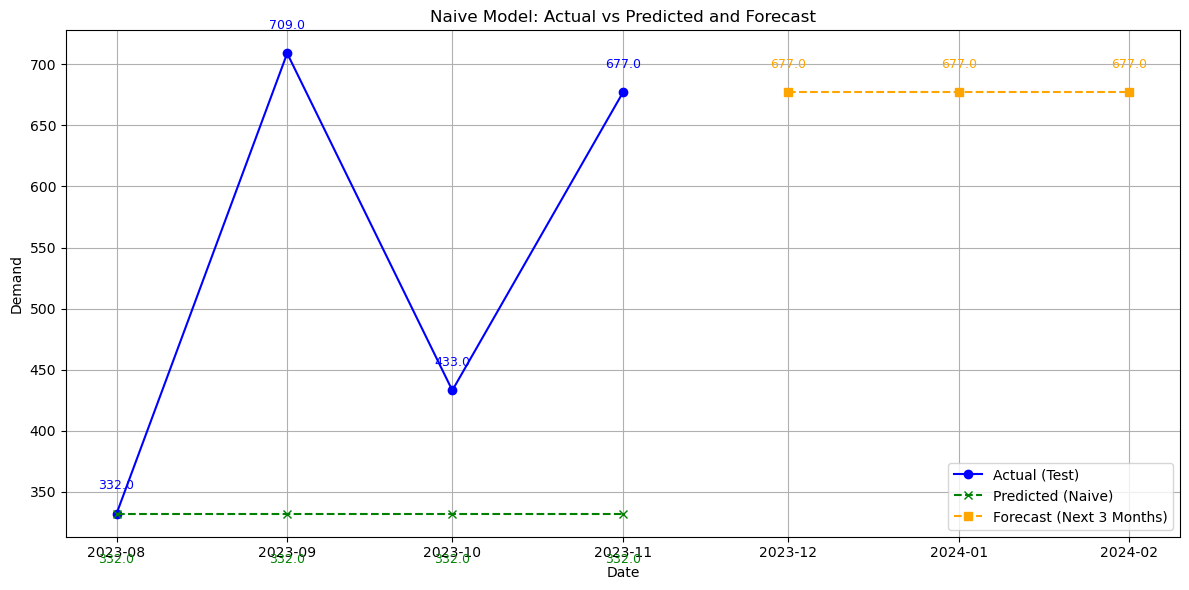

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# --- NAIVE MODEL ---

# Step 1: Use last value of training data as prediction for test
naive_forecast_test = [train['Demand'].iloc[-1]] * len(test)

# Step 2: Calculate MAPE
mape_naive = mean_absolute_percentage_error(test['Demand'], naive_forecast_test) * 100
print(f"MAPE on Test Set (Naive): {mape_naive:.2f}%")

# Step 3: Forecast next 3 months using last value of full data
naive_forecast_next3 = [data['Demand'].iloc[-1]] * 3
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')
naive_forecast_series = pd.Series(naive_forecast_next3, index=future_dates)

# Step 4: Create DataFrames for display
results_df = pd.DataFrame({
    "Actual (Test)": test['Demand'].values,
    "Predicted (Naive)": naive_forecast_test
}, index=test.index)

forecast_df = pd.DataFrame({
    "Forecast (Next 3 Months)": naive_forecast_series
})

print("\nActual vs Predicted (Test Set):")
print(results_df)

print("\nNaive Forecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_df)

# --- PLOTTING ---

plt.figure(figsize=(12, 6))

# Plot actual test values
plt.plot(test.index, test['Demand'], label='Actual (Test)', marker='o', color='blue')
for i, val in enumerate(test['Demand']):
    plt.text(test.index[i], val + 20, f'{val}', ha='center', fontsize=9, color='blue')

# Plot predicted values
plt.plot(test.index, naive_forecast_test, label='Predicted (Naive)', linestyle='--', marker='x', color='green')
for i, val in enumerate(naive_forecast_test):
    plt.text(test.index[i], val - 40, f'{val}', ha='center', fontsize=9, color='green')

# Plot forecast for next 3 months
plt.plot(future_dates, naive_forecast_next3, label='Forecast (Next 3 Months)', linestyle='--', marker='s', color='orange')
for i, val in enumerate(naive_forecast_next3):
    plt.text(future_dates[i], val + 20, f'{val}', ha='center', fontsize=9, color='orange')

plt.title('Naive Model: Actual vs Predicted and Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\satyarth\AppData\Local\Temp\ipykernel_12204\3428282520.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-04-30', periods=len(actual_data), freq='M')
C:\Users\satyarth\AppData\Local\Temp\ipykernel_12204\3428282520.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')


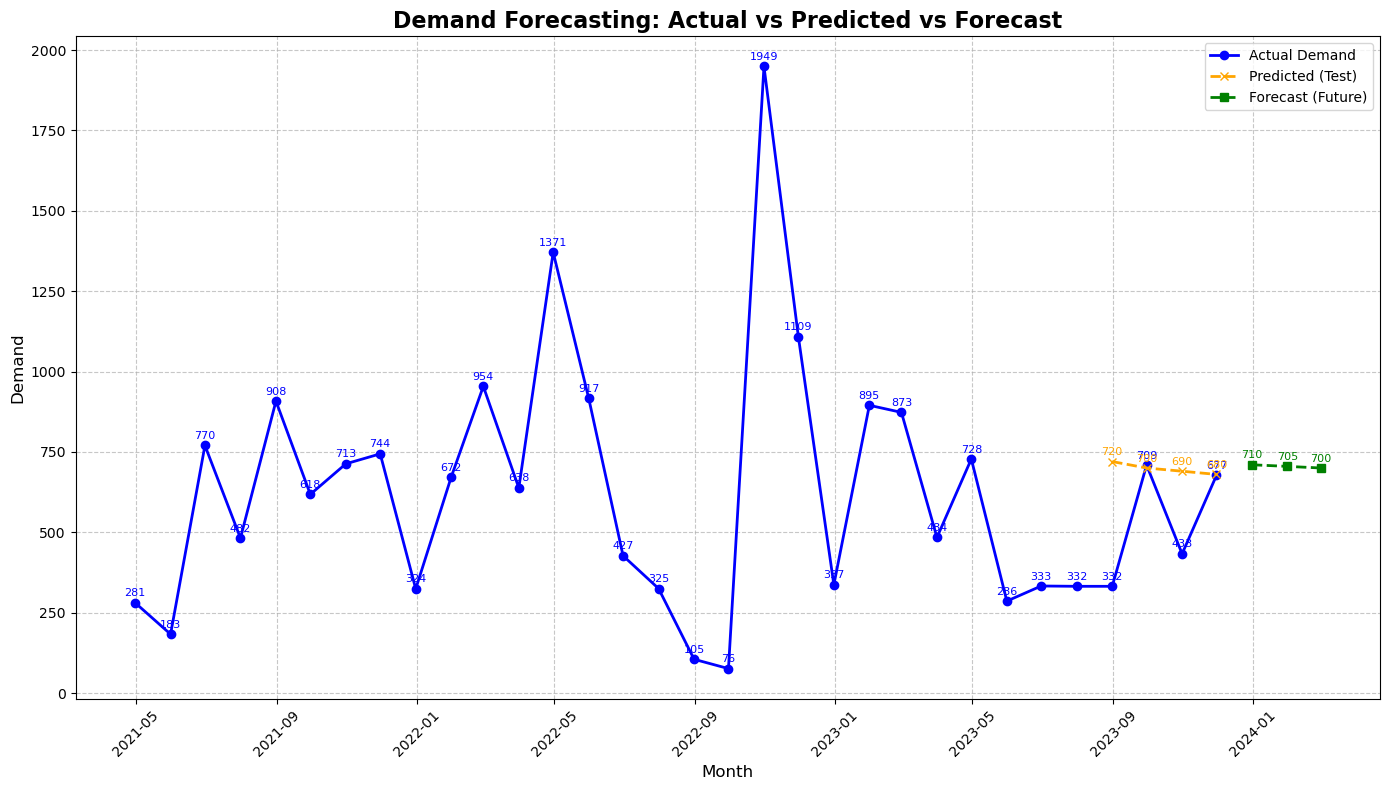

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dates = pd.date_range(start='2021-04-30', periods=len(actual_data), freq='M')
data = pd.DataFrame({'Demand': actual_data}, index=dates)

# Define test set (last 4 months) and a placeholder predicted test (example values)
test = data[-4:]
predicted_test = pd.Series([720, 700, 690, 680], index=test.index)  # Replace with actual model predictions

# Define future forecast (next 3 months)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')
forecast_future = pd.Series([710, 705, 700], index=forecast_index)  # Replace with your actual forecast values

# Step 2: Setup the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot actual data
ax.plot(data.index, data['Demand'], label='Actual Demand', color='blue', marker='o', linewidth=2)
for x, y in zip(data.index, data['Demand']):
    ax.text(x, y+20, f'{y}', ha='center', fontsize=8, color='blue')

# Plot predicted test values
ax.plot(predicted_test.index, predicted_test.values, label='Predicted (Test)', color='orange', linestyle='--', marker='x', linewidth=2)
for x, y in zip(predicted_test.index, predicted_test.values):
    ax.text(x, y+20, f'{int(y)}', ha='center', fontsize=8, color='orange')

# Plot forecast values
ax.plot(forecast_future.index, forecast_future.values, label='Forecast (Future)', color='green', linestyle='--', marker='s', linewidth=2)
for x, y in zip(forecast_future.index, forecast_future.values):
    ax.text(x, y+20, f'{int(y)}', ha='center', fontsize=8, color='green')

# Step 3: Configure the plot
ax.set_title('Demand Forecasting: Actual vs Predicted vs Forecast', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Demand', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
